We recover the equation of the curve invariant by an involution. Recall that $f_6(x,y,z)=0$ is the equation of the quotient curve with respect to the involution, which has two cusps tangent to $z=0$ at $[1:0:0]$ and $[0:1:0]$ and to $\mathbb{E}_6$ points. The curve is $f_6(x,y,z^2)=0$.

In [4]:
f6 = load('files2/octica-sim2-rational.sobj')
R = f6.parent()
R.inject_variables()

Defining x, y, z


In [7]:
dis = f6.discriminant(z).factor()
dis

(1/1533312) * y^3 * x^3 * (x^2 - 24*x*y + 12*y^2) * (3*x^2 + 16*x*y + 36*y^2)^8

The factor of degree contains the coordinates for the $\mathbb{E}_6$ points. Let us check first the cusps, showing the Newton polytope at the affine coordinates.

In [8]:
S.<u, v> = QQ[]

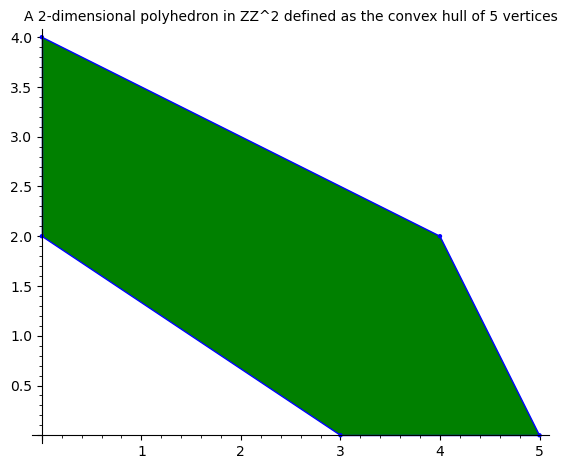

In [10]:
g = f6(x=1, y=u, z=v)
g.newton_polytope()

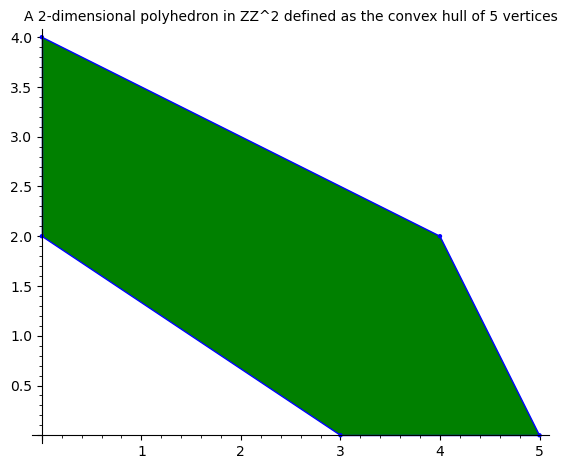

In [11]:
g = f6(x=u, y=1, z=v)
g.newton_polytope()

For the $\mathbb{E}_6$ points we need a field $K$ generated by a root $a$ of the polynomial $3 t^2 + 16 t + 36$.

In [12]:
T.<t> = QQ[]
p = dis[-1][0](x=t, y=1)
p

3*t^2 + 16*t + 36

We look for the other coordinate of the singular point.

In [21]:
K.<a> = NumberField(p)
RK = R.change_ring(K)
RK.inject_variables(verbose=False)
f6a = f6.change_ring(K)
disf = f6a(x=a * y).factor()
disf

((33880/243*a + 31339/27)) * (y^2 + (6/77*a + 5/77)*z) * (y^2 + (-2/33*a - 5/99)*z)^3

In [23]:
b = -1/disf[-1][0].monomial_coefficient(z)
b

-2*a - 9

After a translation the singular point is $(0,0)$. We compute the tangent cone.

In [27]:
SK = S.change_ring(K)
SK.inject_variables(verbose=False)
g = f6a(x=u + a, y=1, z=v + b)

In [33]:
tg = sum(a * b for a, b in g if b.degree() == 3)
tg.factor()

((464/9*a + 144)) * (u + (3/20*a + 7/10)*v)^3

In [37]:
c = -1/tg.factor()[0][0].monomial_coefficient(v)

After this change of variable, the tangent cone is $v=0$. The Newton polygon shows that the topological type is $

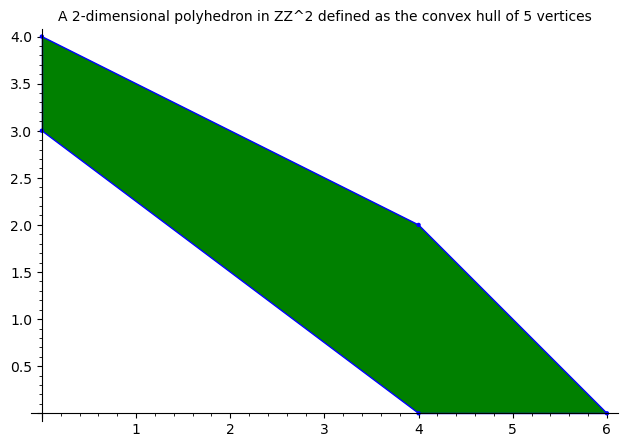

In [39]:
g = g(v=v + c * u)
g.newton_polytope()